El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [3]:
# Configuración general
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
RANDOM_STATE = 42

Dimensiones del dataset: (354369, 16)


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DateCrawled,354369,15470,05/03/2016 14:25,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,354369.0,NaN,NaN,NaN,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
VehicleType,316879,8,sedan,91457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RegistrationYear,354369.0,NaN,NaN,NaN,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Gearbox,334536,2,manual,268251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,354369.0,NaN,NaN,NaN,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Model,334664,250,golf,29232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,354369.0,NaN,NaN,NaN,128211.172535,37905.34153,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,NaN,NaN,NaN,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
FuelType,321474,7,petrol,216352,NaN,NaN,NaN,NaN,NaN,NaN,NaN


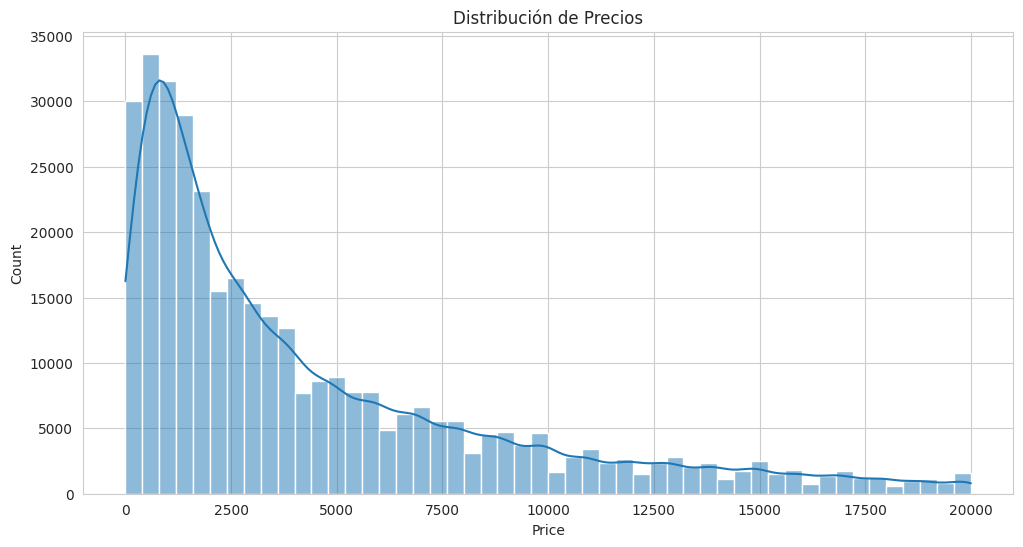

In [4]:

df = pd.read_csv('car_data.csv')

# Exploración inicial
print("Dimensiones del dataset:", df.shape)
display(df.head())
display(df.info())

# Análisis estadístico
display(df.describe(include='all').T)

# Visualizaciones clave
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.show()

In [5]:
# Eliminar columnas irrelevantes
df_clean = df.drop(['DateCrawled', 'PostalCode', 'DateCreated', 'LastSeen', 'NumberOfPictures'], axis=1)

# Manejo de valores nulos
for col in ['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Filtrar outliers
df_clean = df_clean[
    (df_clean['RegistrationYear'] >= 1950) & 
    (df_clean['RegistrationYear'] <= 2023) &
    (df_clean['Price'] > 100) &
    (df_clean['Power'] <= 500)
]

## Entrenamiento del modelo 

In [6]:
# Codificación de variables categóricas
cat_cols = ['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired', 'Brand', 'Model']
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

# División de datos
X = df_encoded.drop('Price', axis=1)
y = np.log1p(df_encoded['Price'])  # Transformación logarítmica

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE
)

In [7]:
# Función de evaluación
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

In [8]:
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr_rmse = evaluate_model(lr, X_test, y_test)
print(f'RMSE Regresión Lineal: {lr_rmse:.4f}')


CPU times: user 8.28 s, sys: 1.74 s, total: 10 s
Wall time: 10 s
RMSE Regresión Lineal: 0.6672


In [11]:
# Bosque Aleatorio
# %%
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_leaf': [2, 5]
}
rf = RandomForestRegressor(random_state=RANDOM_STATE)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
%time rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
rf_rmse = evaluate_model(best_rf, X_test, y_test)
print(f'Mejores parámetros: {rf_grid.best_params_}')
print(f'RMSE Bosque Aleatorio: {rf_rmse:.4f}')

CPU times: user 1h 30min 37s, sys: 1min 20s, total: 1h 31min 58s
Wall time: 1h 32min 7s
Mejores parámetros: {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 200}
RMSE Bosque Aleatorio: 0.4850


In [12]:
# LightGBM
# 
lgbm_params = {
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 63],
    'max_depth': [5, 7]
}

lgbm = LGBMRegressor(random_state=RANDOM_STATE)
lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
%time lgbm_grid.fit(X_train, y_train)

best_lgbm = lgbm_grid.best_estimator_
lgbm_rmse = evaluate_model(best_lgbm, X_test, y_test)
print(f'Mejores parámetros: {lgbm_grid.best_params_}')
print(f'RMSE LightGBM: {lgbm_rmse:.4f}')

CPU times: user 1min 29s, sys: 5 s, total: 1min 34s
Wall time: 1min 34s
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'num_leaves': 63}
RMSE LightGBM: 0.4774


In [13]:
catboost = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    silent=True
)
%time catboost.fit(X_train, y_train)
cb_rmse = evaluate_model(catboost, X_test, y_test)
print(f'RMSE CatBoost: {cb_rmse:.4f}')


CPU times: user 13.3 s, sys: 344 ms, total: 13.7 s
Wall time: 13.8 s
RMSE CatBoost: 0.4830


## Análisis del modelo

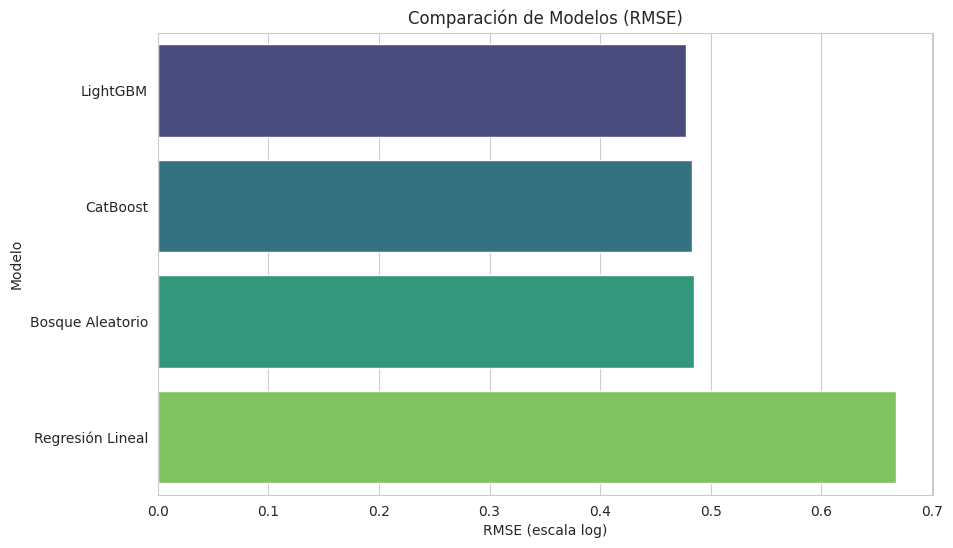

In [15]:
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Bosque Aleatorio', 'LightGBM', 'CatBoost'],
    'RMSE': [lr_rmse, rf_rmse, lgbm_rmse, cb_rmse]
}).sort_values('RMSE')

plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Modelo', data=results, palette='viridis')
plt.title('Comparación de Modelos (RMSE)')
plt.xlabel('RMSE (escala log)')
plt.show()

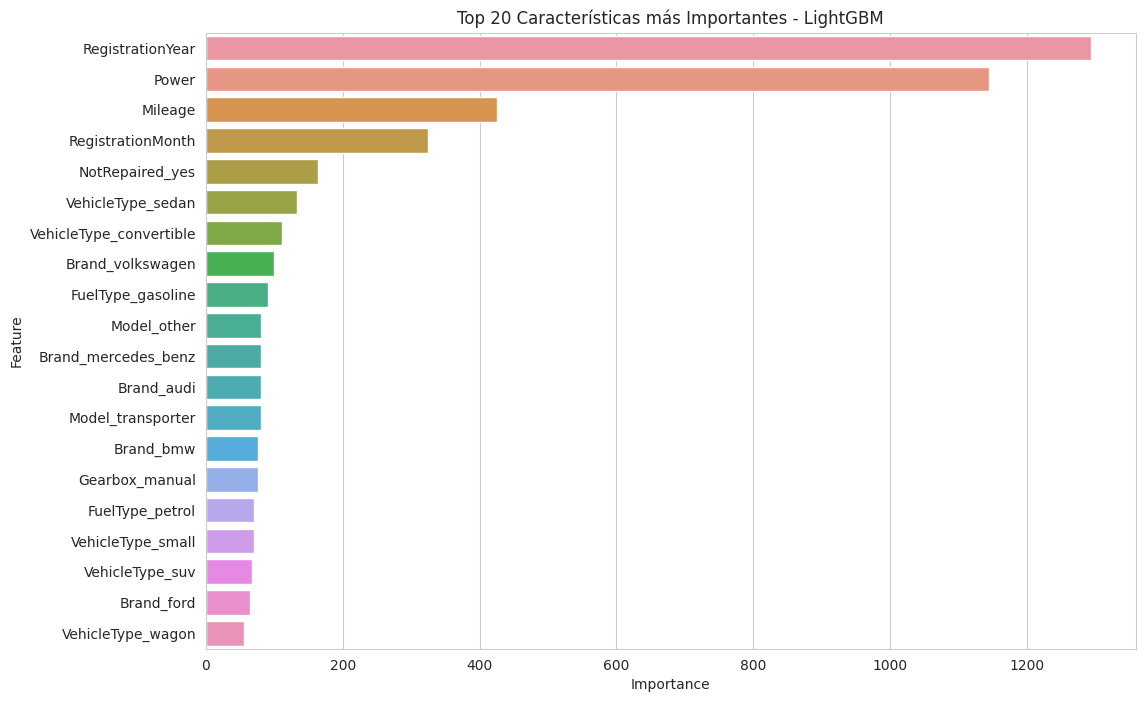

In [16]:
#Análisis de Importancia de Características
#
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lgbm.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 20 Características más Importantes - LightGBM')
plt.show()

In [17]:
# Prueba del Modelo Final
def predict_price(model, sample_data):
    prediction = np.expm1(model.predict(sample_data))
    return f"Precio estimado: €{prediction[0]:,.2f}"

# Ejemplo de datos de prueba
sample = X_test.sample(1, random_state=RANDOM_STATE)
display(sample)
print(predict_price(best_lgbm, sample))

,RegistrationYear,Power,Mileage,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,Gearbox_manual,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,NotRepaired_yes,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_chrysler,Brand_citroen,Brand_dacia,Brand_daewoo,Brand_daihatsu,Brand_fiat,Brand_ford,Brand_honda,Brand_hyundai,Brand_jaguar,Brand_jeep,Brand_kia,Brand_lada,Brand_lancia,Brand_land_rover,Brand_mazda,Brand_mercedes_benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opel,Brand_peugeot,Brand_porsche,Brand_renault,Brand_rover,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Model_145,Model_147,Model_156,Model_159,Model_1_reihe,Model_1er,Model_200,Model_2_reihe,Model_300c,Model_3_reihe,Model_3er,Model_4_reihe,Model_500,Model_5_reihe,Model_5er,Model_601,Model_6_reihe,Model_6er,Model_7er,Model_80,Model_850,Model_90,Model_900,Model_9000,Model_911,Model_a1,Model_a2,Model_a3,Model_a4,Model_a5,Model_a6,Model_a8,Model_a_klasse,Model_accord,Model_agila,Model_alhambra,Model_almera,Model_altea,Model_amarok,Model_antara,Model_arosa,Model_astra,Model_auris,Model_avensis,Model_aveo,Model_aygo,Model_b_klasse,Model_b_max,Model_beetle,Model_berlingo,Model_bora,Model_boxster,Model_bravo,Model_c1,Model_c2,Model_c3,Model_c4,Model_c5,Model_c_klasse,Model_c_max,Model_c_reihe,Model_caddy,Model_calibra,Model_captiva,Model_carisma,Model_carnival,Model_cayenne,Model_cc,Model_ceed,Model_charade,Model_cherokee,Model_citigo,Model_civic,Model_cl,Model_clio,Model_clk,Model_clubman,Model_colt,Model_combo,Model_cooper,Model_cordoba,Model_corolla,Model_corsa,Model_cr_reihe,Model_croma,Model_crossfire,Model_cuore,Model_cx_reihe,Model_defender,Model_delta,Model_discovery,Model_doblo,Model_ducato,Model_duster,Model_e_klasse,Model_elefantino,Model_eos,Model_escort,Model_espace,Model_exeo,Model_fabia,Model_fiesta,Model_focus,Model_forester,Model_forfour,Model_fortwo,Model_fox,Model_freelander,Model_fusion,Model_g_klasse,Model_galant,Model_galaxy,Model_getz,Model_gl,Model_glk,Model_golf,Model_grand,Model_i3,Model_i_reihe,Model_ibiza,Model_impreza,Model_insignia,Model_jazz,Model_jetta,Model_jimny,Model_juke,Model_justy,Model_ka,Model_kadett,Model_kaefer,Model_kalina,Model_kalos,Model_kangoo,Model_kappa,Model_kuga,Model_laguna,Model_lancer,Model_lanos,Model_legacy,Model_leon,Model_lodgy,Model_logan,Model_lupo,Model_lybra,Model_m_klasse,Model_m_reihe,Model_materia,Model_matiz,Model_megane,Model_meriva,Model_micra,Model_mii,Model_modus,Model_mondeo,Model_move,Model_musa,Model_mustang,Model_mx_reihe,Model_navara,Model_niva,Model_note,Model_nubira,Model_octavia,Model_omega,Model_one,Model_other,Model_outlander,Model_pajero,Model_panda,Model_passat,Model_phaeton,Model_picanto,Model_polo,Model_primera,Model_ptcruiser,Model_punto,Model_q3,Model_q5,Model_q7,Model_qashqai,Model_r19,Model_range_rover,Model_range_rover_evoque,Model_range_rover_sport,Model_rangerover,Model_rav,Model_rio,Model_roadster,Model_roomster,Model_rx_reihe,Model_s60,Model_s_klasse,Model_s_max,Model_s_type,Model_samara,Model_sandero,Model_santa,Model_scenic,Model_scirocco,Model_seicento,Model_serie_1,Model_serie_2,Model_serie_3,Model_sharan,Model_signum,Model_sirion,Model_sl,Model_slk,Model_sorento,Model_spark,Model_spider,Model_sportage,Model_sprinter,Model_stilo,Model_superb,Model_swift,Model_terios,Model_tigra,Model_tiguan,Model_toledo,Model_touareg,Model_touran,Model_transit,Model_transporter,Model_tt,Model_tucson,Model_twingo,Model_up,Model_v40,Model_v50,Model_v60,Model_v70,Model_v_klasse,Model_vectra,Model_verso,Model_viano,Model_vito,Model_vivaro,Model_voyager,Model_wrangler,Model_x_reihe,Model_x_trail,Model_x_type,Model_xc_reihe,Model_yaris,Model_yeti,Model_ypsilon,Model_z_reihe,Model_zafira
128905,2004,64,125000,8,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

Precio estimado: €3,165.25
